# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

**Note on the short answer questions**: For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayes' Theorem



In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions [Suggested time: 20 minutes]

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2`, respectively, in the next cell:

1.a.1) $P(A and B)$
1.a.2) $P(A|B)$

Hint: draw a diagram!


In [2]:
ans1 =  0.4 * 0.7
ans2 = ans1/0.5
print('ans1', ans1)
print('ans2', ans2)

ans1 0.27999999999999997
ans2 0.5599999999999999


### b. Card Combinatorics

A standard deck of playing cards consists of 52 cards in each of the four suits of spades, hearts, diamonds, and clubs. Each suit contains 13 cards: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
    
You have a standard deck of 52 cards and are asked the following questions:

1.b.1) What is the probability of drawing a King or a Queen?

1.b.2) How many possible 5-card combinations can be formed with this deck of 52 cards?

Answer the questions below:

In [4]:
import math
ans1 = (4 + 4)/52 # there are 4 king's an 4 queen's 
ans2 = math.factorial(52)/(math.factorial(52-5) * math.factorial(5))
print('ans1', ans1)
print('ans2', ans2)

ans1 0.15384615384615385
ans2 2598960.0


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (Jack, Queen, or King). 

The function `probability_of_scoring_k` is provided below. In this function, $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point. The function returns the corresponding probability of scoring $k$ points given $n$ and $p$.

In [6]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1.c.1) What is the probability $p$ of winning a point? 

In [7]:
# your code here 
p = (4 + 4 + 4 )/ 52 # there are 3 face cards
print('probability of winning a point', p)

probability of winning a point 0.23076923076923078


1.c.2) Use the function `probability_of_scoring_k` to compute the probability of scoring 8 points out out of 22 draws.

In [8]:
# your code here 
ans1 = probability_of_scoring_k(n=22, p=p, k=8)
print(ans1)

0.06532117736042573


1.c.3) Use the function `probability_of_scoring_k` to calculate the probability of drawing $k$ points out of 22 draws, for $k$ ranging from 0 to 22. 

_Hint: Your final result should be in the form of a list or array._

In [12]:
# your code here
k_values = range(23)
p_values = [probability_of_scoring_k(n=22, p=p, k=i) for i in k_values]
print(len(p_values))

23


1.c.4) Plot your results to create the probability mass function. Use a bar plot. What type of distribution does the `probability_of_scoring_k` have?

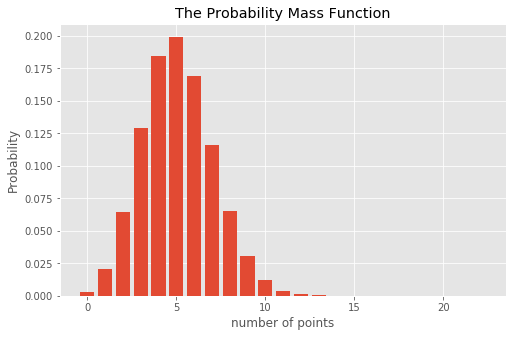

In [13]:
# your code here 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(8,5))

plt.bar(k_values, p_values);
plt.title("The Probability Mass Function");
plt.xlabel('number of points')
plt.ylabel('Probability')
plt.show()

In [14]:
# your answer here 
# This is a Bernoulli distribution with distinct values 

## Part 2: Statistical Distributions [Suggested time: 25 minutes]

### a. Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

2.a.1) Write a function to compute the z-scores for single checks of amount `check_amt`.

In [18]:
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    z_score = (check_amt - mu)/(sigma)
    
    return z_score

2.a.2) I go to the TexMex restaurant and get a check for 24 dollars. 

Use your function to compute your check's z-score, and interpret the result using the empirical rule. 

In [19]:
# your code here 
mu = 20
sigma = 2

# check's z-score
z_score(24)


2.0

In [37]:
# your answer here
# the above normal distribution has a mean of 20 and sigama of 2. The above calcualted z_score (24) is exactly at 
# two standard divation away . i.e 16 <= confidence interval <= 24

2.a.3) Using $\alpha = 0.05$, is my 25 dollar check significantly **greater** than the mean? How do you know this?  

Hint: Here's a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf) but you can also use some libraries available in python.

In [23]:
# your code here 
# calculate z-score for 25 dollar check
z_score(25)
print('z_score', z_score)

# look for p on z-table
p_25dollar =  1 - 0.99461 
print('Probabilty of 25 dollar check', p_25dollar)


z_score <function z_score at 0x1a14d9d7b8>
Probabilty of 25 dollar check 0.005390000000000006


In [39]:
# your answer here 
# looking the above p_value of 0.0054, the 25 dollar check is significantly greater than the mean (20 dollar)

### b. Confidence Intervals and the Central Limit Theorem

2.b.1) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [25]:
# your code here 
z_crit = stats.norm.ppf(q=1-0.025)
print('Critical z_value', z_crit)
moe = z_crit * sigma  # margin of error
conf = (mu - moe, mu + moe)
print('95% confidence interval around the mean is:', conf)


Critical z_value 1.959963984540054
95% confidence interval around the mean is: (16.080072030919894, 23.919927969080106)


In [41]:
# your written answer here
# if we are doing two tailed test, if we are taking a lot of samples and calucate there mean,
# we should see the means failes within the confidence interval at 95% confidence level  

2.b.2) Imagine that we didn't know how the population of check totals was distributed. How would **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu$ of the population mean?

In [42]:
# Your written answer here
# The Central Limit Theorem says that if we take a number of repeated samples from the population and calculate 
# the average mean and standard devation of the samples, the samples means will tend to a normal distribution. 

## Part 3: Statistical Testing [Suggested time: 15 minutes]

The TexMex restaurant recently introduced Queso to its menu.

We have random samples of 1000 "No Queso" order check totals and 1000 "Queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

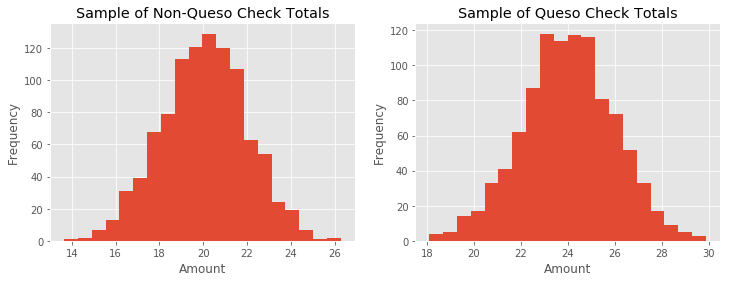

In [26]:
# Load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### a. Hypotheses and Errors

The restaurant owners want to know if customers who order Queso spend **more or less** than customers who do not order Queso.

3.a.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [44]:
# Your written answer here
# Null hypotheses = There is no difference in check totals between customers ordering Queso or non-Queso 
# Alternative hypotheses = There is a difference in check totals between customers ordering Queso or non-Queso 

3.a.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [45]:
# your answer here
# Type I = saying the total check in queso customers are different when they are the same

# Type II: saying the total check in queso customers are the same when they are different

### b. Sample Testing

3.b.1) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. Can you reject the null hypothesis? 

_Hint: Use `scipy.stats`._

In [30]:
# your code here 
print('no-queso mean', no_queso.mean())
print('queso mean', queso.mean())
stats.ttest_ind(queso, no_queso, equal_var=True)

no-queso mean 20.047532509358607
queso mean 23.992814607054243


Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [47]:
# your answer here
# Since the resulting p_value is way less than the significance level, we can say the means are siginificanlty
# differnt and reject the Null hypotesis

## Part 4: Bayes' Theorem [Suggested time: 15 minutes]

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

4.a.1) What is the probability of Thomas getting a small puppy?
4.a.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
4.a.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4.a.4) For Part 2, what is the prior, posterior and likelihood?

In [36]:
p_ps, p_p = 0.2, 1-0.2  # ps= pet store and p= pound 
p_s_given_ps = 0.6
p_m_given_ps = 0.3
p_l_given_ps = 0.1
p_s_given_p = 0.1
p_m_given_p = 0.35
p_l_given_p = 0.55
# print(p_p)

In [35]:
ans1 = p_ps * p_s_given_ps + p_p * p_s_given_p
ans2 = (p_l_given_ps * p_ps)/((p_l_given_ps * p_ps) + (p_l_given_p * p_p))
ans_ps = p_s_given_ps * p_ps
ans_p = p_s_given_p * p_p
print('probability of Thomas getting a small puppy', ans1)
print('probability of Thomas going to pet store knowing he gets large puppy', ans2)
print('probability of Thomas going to pet store knowing he gets small puppy', ans_ps)
print('probability of Thomas going to pound knowing he gets small puppy', ans_p)
print('Thomas probably went to a pet store to get his small puppy')

probability of Thomas getting a small puppy 0.2
probability of Thomas going to pet store knowing he gets large puppy 0.043478260869565216
probability of Thomas going to pet store knowing he gets small puppy 0.12
probability of Thomas going to pound knowing he gets small puppy 0.08000000000000002
Thomas probably went to a pet store to get his small puppy


In [48]:
ans4_prior = "Probablity of Thomas going to a pet store"
ans4_posterior = "Probablity of Thomas going to a pet store knowing that he gets a large pupppy"
ans4_likelihood = "Probablity of Thomas getting large pupppy knowing that he went to pet store"